# Heart Failure Prediction Dataset
https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

heart = pd.read_csv('./data/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


1. Age: 나이(년)
2. Sex: 성별(M:남자, F:여자)
3. ChestPainType: 가슴 통증 종류(TA: Typical Angina(전형적 협심증), ATA: Atypical Angina(비전형적 흉통), NAP: Non-Anginal Pain(비협심증 흉통), ASY: Asymptomatic(무증상)) - [anginal pain (협심증)](https://blog.naver.com/swseungwoo/222197288576)
4. RestingBP: 안정 혈압(mmHg)
5. Cholesterol: 혈청 콜레스테롤(mm/dl)
6. FastingBS: 공복혈당(1: if FastingBS > 120 mg/dl, 0: otherwise)
7. RestingECG: 휴식 중 심전도(Normal: 보통, ST: ST-T파에 이상이 있음 (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: Estes' criteria에 의해 좌심실대비증이 의심되거나 확실한 경우)
8. MaxHR: 최대 심박수(60과 202 사이의 수치형 변수)
9. ExerciseAngina: 운동성 협심증(Y: Yes, N: No)
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]  
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
12. HeartDisease: output class [1: heart disease, 0: Normal]

## 예측
원핫인코딩을 하면서 `drop_first` 옵션을 통해 column 수를 줄임

In [2]:
df = pd.get_dummies(heart, drop_first=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [3]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

X.shape, y.shape

((918, 15), (918,))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

X_train.shape, X_test.shape

((780, 15), (138, 15))

### Scaling
KNN, SVM 등을 쓰기 위하여 필요함  
tree 모델에는 필요 없으나 하지 않을 이유도 없다.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 로지스틱 회귀

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(fit_intercept=False)

params = {'tol':[0.001, 0.0001],
          'C':[0.1, 0.5, 1.0, 2.0]}

grid_lr = GridSearchCV(lr, param_grid=params, cv=5,
                       refit=True, return_train_score=True)

grid_lr.fit(X_train_scaled, y_train)

scores_df = pd.DataFrame(grid_lr.cv_results_)
scores_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_tol,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.008976,0.000631,0.000399,0.000489,2.0,0.001,"{'C': 2.0, 'tol': 0.001}",0.814103,0.865385,0.852564,...,0.856410,0.024860,1,0.881410,0.865385,0.871795,0.865385,0.858974,0.868590,0.007585
7,0.008776,0.000746,0.000599,0.000489,2.0,0.0001,"{'C': 2.0, 'tol': 0.0001}",0.814103,0.865385,0.852564,...,0.856410,0.024860,1,0.881410,0.865385,0.871795,0.865385,0.858974,0.868590,0.007585
0,0.005600,0.002235,0.000199,0.000399,0.1,0.001,"{'C': 0.1, 'tol': 0.001}",0.807692,0.852564,0.871795,...,0.855128,0.026149,3,0.873397,0.866987,0.857372,0.860577,0.858974,0.863462,0.005945
1,0.004388,0.000489,0.000399,0.000489,0.1,0.0001,"{'C': 0.1, 'tol': 0.0001}",0.807692,0.852564,0.871795,...,0.855128,0.026149,3,0.873397,0.866987,0.857372,0.860577,0.858974,0.863462,0.005945
2,0.006782,0.000399,0.000200,0.000399,0.5,0.001,"{'C': 0.5, 'tol': 0.001}",0.820513,0.852564,0.852564,...,0.853846,0.022353,5,0.876603,0.858974,0.866987,0.862179,0.858974,0.864744,0.006615


In [7]:
grid_lr.best_params_

{'C': 2.0, 'tol': 0.001}

In [8]:
grid_lr.best_score_

0.8564102564102564

정확도: 0.8841, 정밀도: 0.8750, 재현율: 0.9211, f1 score: 0.8974, ROC_AUC score: 0.9493


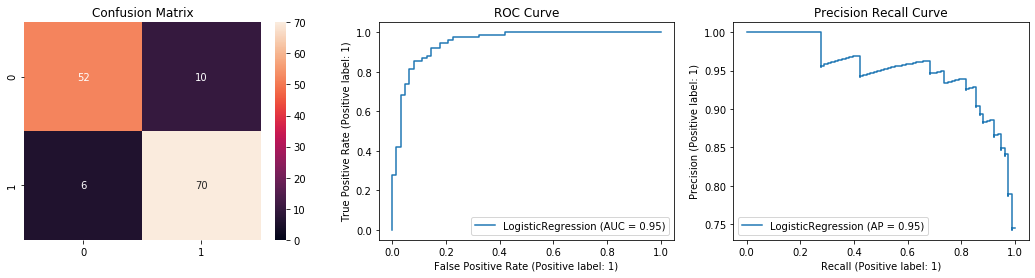

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, plot_roc_curve, plot_precision_recall_curve

def get_scores(model, X, y):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_proba)
    
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1 score: {f1:.4f}, ROC_AUC score: {auc:.4f}')
    
    con = confusion_matrix(y, y_pred)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    sns.heatmap(data=con, vmin=0, annot=True, ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    plot_roc_curve(model, X, y, ax=axes[1])
    axes[1].set_title('ROC Curve')
    
    plot_precision_recall_curve(model, X, y, ax=axes[2])
    axes[2].set_title('Precision Recall Curve')
    
    plt.show()
    
get_scores(grid_lr.best_estimator_, X_test_scaled, y_test)

### 랜덤포레스트

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=256)

params = {'max_depth':[None, 5, 7, 10, 15],
          'min_samples_split':[2, 3, 5],
          'min_samples_leaf':[1, 2, 4]}

grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_rf.fit(X_train_scaled, y_train)

scores_df = pd.DataFrame(grid_rf.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
41,0.125067,0.001025,0.009975,6.308290e-04,15,2,5,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.820513,0.897436,...,0.862821,0.025833,1,0.951923,0.947115,0.950321,0.950321,0.943910,0.948718,0.002867
5,0.126462,0.001163,0.009774,3.989458e-04,None,2,5,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.820513,0.897436,...,0.862821,0.025833,1,0.948718,0.947115,0.950321,0.948718,0.943910,0.947756,0.002174
30,0.124860,0.004930,0.009575,4.885202e-04,10,2,2,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.820513,0.884615,...,0.862821,0.022057,1,0.955128,0.943910,0.947115,0.950321,0.937500,0.946795,0.005945
31,0.127653,0.002676,0.009774,3.990650e-04,10,2,3,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.820513,0.884615,...,0.862821,0.022057,1,0.955128,0.943910,0.947115,0.950321,0.937500,0.946795,0.005945
35,0.124268,0.002148,0.009973,1.907349e-07,10,4,5,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.814103,0.878205,...,0.861538,0.026770,5,0.915064,0.908654,0.903846,0.921474,0.907051,0.911218,0.006297


In [12]:
grid_rf.best_params_

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [13]:
grid_rf.best_score_

0.8628205128205128

정확도: 0.8986, 정밀도: 0.8974, 재현율: 0.9211, f1 score: 0.9091, ROC_AUC score: 0.9495


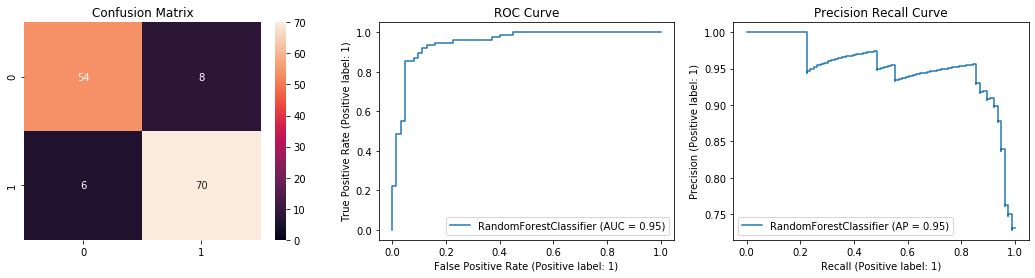

In [14]:
get_scores(grid_rf.best_estimator_, X_test_scaled, y_test)

### XGBoost

In [16]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=0)

params = {'max_depth':[None, 5, 7, 10, 15],
          'min_child_weight':[2, 3, 5],
          'colsample_bytree':[0.5, 0.8, 1.0]
          }

grid_xgb = GridSearchCV(xgb_clf, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_xgb.fit(X_train_scaled, y_train)

scores_df = pd.DataFrame(grid_xgb.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

[14:23:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:23:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:23:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:23:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:23:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:23:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:23:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,0.051263,0.002410,0.002992,1.168008e-07,0.5,10,3,"{'colsample_bytree': 0.5, 'max_depth': 10, 'mi...",0.801282,0.891026,...,0.858974,0.034639,1,0.993590,0.995192,0.991987,0.998397,0.993590,0.994551,0.002174
13,0.049468,0.001017,0.002992,3.234067e-07,0.5,15,3,"{'colsample_bytree': 0.5, 'max_depth': 15, 'mi...",0.801282,0.891026,...,0.858974,0.034639,1,0.993590,0.995192,0.991987,0.998397,0.993590,0.994551,0.002174
33,0.049667,0.000399,0.002793,3.990650e-04,1.0,5,2,"{'colsample_bytree': 1.0, 'max_depth': 5, 'min...",0.814103,0.891026,...,0.857692,0.026086,3,1.000000,1.000000,0.998397,1.000000,0.998397,0.999359,0.000785
4,0.046875,0.002443,0.002992,1.168008e-07,0.5,5,3,"{'colsample_bytree': 0.5, 'max_depth': 5, 'min...",0.814103,0.891026,...,0.856410,0.030769,4,0.990385,0.990385,0.990385,0.991987,0.987179,0.990064,0.001570
2,0.044680,0.003645,0.002593,7.977843e-04,0.5,None,5,"{'colsample_bytree': 0.5, 'max_depth': None, '...",0.833333,0.852564,...,0.855128,0.022057,5,0.972756,0.972756,0.974359,0.979167,0.974359,0.974679,0.002355


In [17]:
grid_xgb.best_params_

{'colsample_bytree': 0.5, 'max_depth': 10, 'min_child_weight': 3}

In [18]:
grid_xgb.best_score_

0.8589743589743591

정확도: 0.8768, 정밀도: 0.8831, 재현율: 0.8947, f1 score: 0.8889, ROC_AUC score: 0.9421


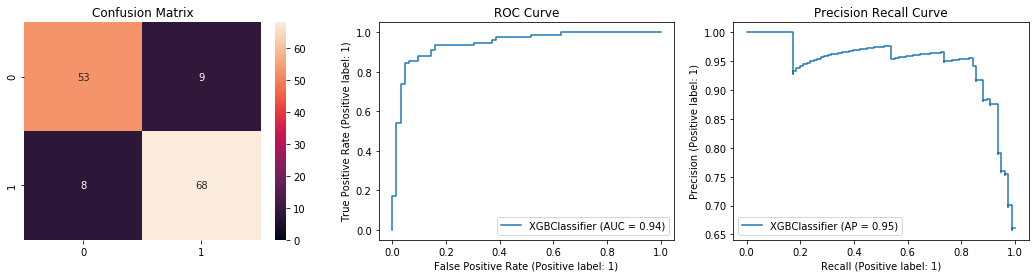

In [19]:
get_scores(grid_xgb.best_estimator_, X_test_scaled, y_test)

### LightGBM

In [20]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

params = {'max_depth':[-1, 5, 7, 10, 15],
          'colsample_bytree':[0.5, 0.8, 1.0]}

grid_lgb = GridSearchCV(lgbm, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_lgb.fit(X_train_scaled, y_train)

scores_df = pd.DataFrame(grid_lgb.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.026529,0.002932,0.000798,3.988981e-04,0.8,5,"{'colsample_bytree': 0.8, 'max_depth': 5}",0.820513,0.897436,0.852564,...,0.860256,0.027616,1,0.980769,0.987179,0.982372,0.988782,0.982372,0.984295,0.003107
1,0.020346,0.001353,0.000997,1.907349e-07,0.5,5,"{'colsample_bytree': 0.5, 'max_depth': 5}",0.826923,0.884615,0.846154,...,0.858974,0.022573,2,0.979167,0.979167,0.977564,0.987179,0.977564,0.980128,0.003598
12,0.031117,0.000399,0.000798,3.989220e-04,1.0,7,"{'colsample_bytree': 1.0, 'max_depth': 7}",0.814103,0.884615,0.852564,...,0.857692,0.026086,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.037914,0.003564,0.001182,4.074542e-04,0.8,7,"{'colsample_bytree': 0.8, 'max_depth': 7}",0.833333,0.878205,0.839744,...,0.856410,0.018842,4,1.000000,0.998397,1.000000,1.000000,1.000000,0.999679,0.000641
11,0.023737,0.001466,0.000997,3.371748e-07,1.0,5,"{'colsample_bytree': 1.0, 'max_depth': 5}",0.801282,0.884615,0.871795,...,0.855128,0.031035,5,0.991987,0.988782,0.982372,0.990385,0.985577,0.987821,0.003452


In [21]:
grid_lgb.best_params_

{'colsample_bytree': 0.8, 'max_depth': 5}

In [22]:
grid_lgb.best_score_

0.8602564102564102

정확도: 0.9203, 정밀도: 0.9452, 재현율: 0.9079, f1 score: 0.9262, ROC_AUC score: 0.9486


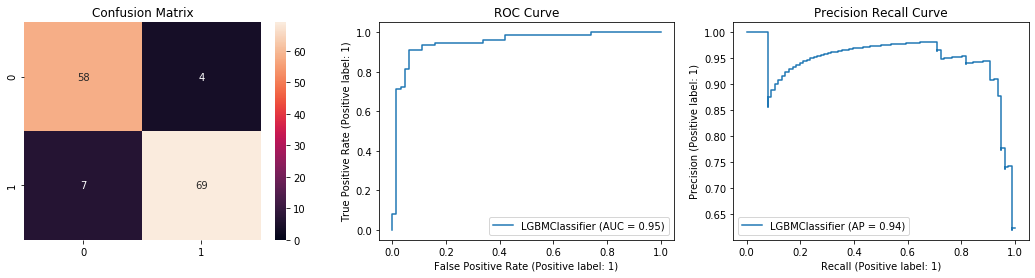

In [23]:
get_scores(grid_lgb.best_estimator_, X_test_scaled, y_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params = {'n_neighbors':range(3, 31)}

grid_knn = GridSearchCV(knn, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_knn.fit(X_train_scaled, y_train)

scores_df = pd.DataFrame(grid_knn.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.001191,0.000387,0.006583,0.000489,5,{'n_neighbors': 5},0.839744,0.871795,0.858974,0.852564,...,0.861538,0.015491,1,0.892628,0.881410,0.884615,0.883013,0.881410,0.884615,0.004179
26,0.001208,0.000407,0.007774,0.000410,29,{'n_neighbors': 29},0.820513,0.852564,0.865385,0.871795,...,0.858974,0.021833,2,0.866987,0.858974,0.863782,0.863782,0.841346,0.858974,0.009178
27,0.001004,0.000012,0.007978,0.000017,30,{'n_neighbors': 30},0.826923,0.852564,0.858974,0.871795,...,0.857692,0.017857,3,0.860577,0.858974,0.857372,0.862179,0.842949,0.856410,0.006919
25,0.001392,0.000493,0.007379,0.000489,28,{'n_neighbors': 28},0.820513,0.852564,0.858974,0.871795,...,0.857692,0.021606,3,0.862179,0.858974,0.863782,0.863782,0.841346,0.858013,0.008516
4,0.001596,0.000489,0.006582,0.000489,7,{'n_neighbors': 7},0.833333,0.858974,0.839744,0.858974,...,0.857692,0.022353,3,0.886218,0.879808,0.875000,0.883013,0.878205,0.880449,0.003873


In [25]:
grid_knn.best_params_

{'n_neighbors': 5}

In [26]:
grid_knn.best_score_

0.8615384615384617

In [28]:
test_error_rates = []
for k in range(3, 31):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_scaled, y_train) 
   
    y_test_pred = KNN_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

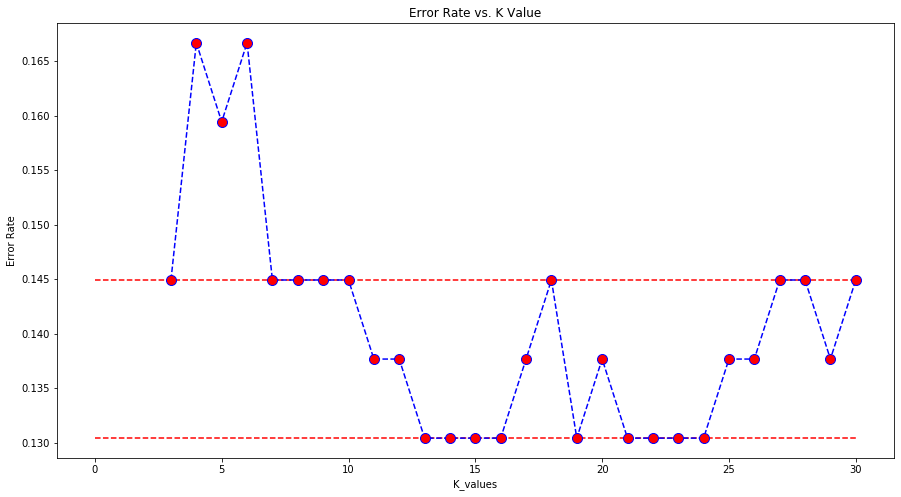

In [31]:
plt.figure(figsize=(15, 8))
plt.plot(range(3, 31), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.14492753623188404, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.13043478260869568, xmin=0, xmax=30, colors='r', linestyles="--");

정확도: 0.8406, 정밀도: 0.8462, 재현율: 0.8684, f1 score: 0.8571, ROC_AUC score: 0.9091


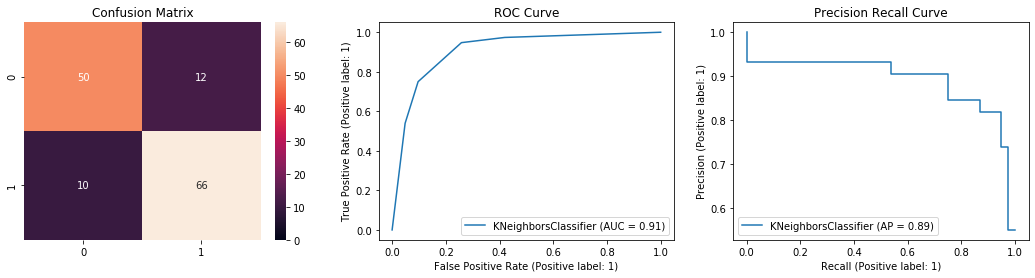

In [33]:
get_scores(grid_knn.best_estimator_, X_test_scaled, y_test)

### SVM

In [32]:
from sklearn.svm import SVC

svc = SVC(random_state=0)

params = {'C': [0.1,1, 10, 100, 1000],
          'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
          'kernel': ['rbf', 'linear']}

grid_svc = GridSearchCV(svc, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_svc.fit(X_train_scaled, y_train)

scores_df = pd.DataFrame(grid_svc.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
50,0.009175,0.000399,0.003391,4.887918e-04,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.833333,0.858974,...,0.862821,0.020513,1,0.894231,0.878205,0.873397,0.870192,0.873397,0.877885,0.008564
20,0.008776,0.000399,0.003989,1.784161e-07,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.826923,0.839744,...,0.860256,0.023779,2,0.883013,0.870192,0.873397,0.873397,0.854167,0.870833,0.009377
34,0.009374,0.000489,0.003391,4.889281e-04,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.814103,0.846154,...,0.857692,0.027616,3,0.900641,0.883013,0.889423,0.889423,0.879808,0.888462,0.007138
31,0.011569,0.001492,0.000997,2.861023e-07,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.820513,0.852564,...,0.857692,0.022718,3,0.883013,0.868590,0.873397,0.870192,0.868590,0.872756,0.005420
33,0.011369,0.001353,0.001397,4.887723e-04,10,1,linear,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",0.820513,0.852564,...,0.857692,0.022718,3,0.883013,0.868590,0.873397,0.870192,0.868590,0.872756,0.005420


In [34]:
grid_svc.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [35]:
grid_svc.best_score_

0.8628205128205128

정확도: 0.8986, 정밀도: 0.8974, 재현율: 0.9211, f1 score: 0.9091


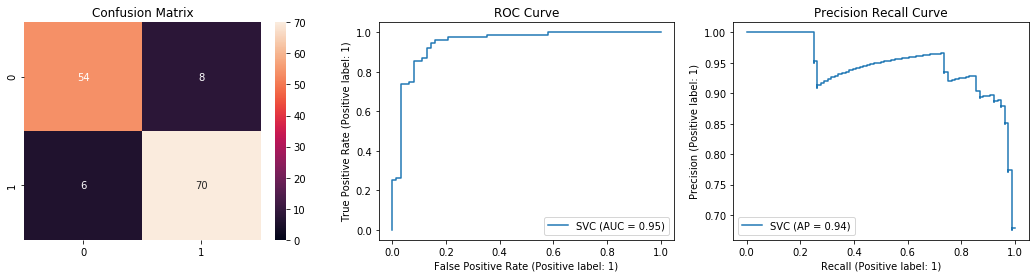

In [38]:
y_pred = grid_svc.best_estimator_.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1 score: {f1:.4f}')

con = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.heatmap(data=con, vmin=0, annot=True, ax=axes[0])
axes[0].set_title('Confusion Matrix')

plot_roc_curve(grid_svc.best_estimator_, X_test_scaled, y_test, ax=axes[1])
axes[1].set_title('ROC Curve')

plot_precision_recall_curve(grid_svc.best_estimator_, X_test_scaled, y_test, ax=axes[2])
axes[2].set_title('Precision Recall Curve')

plt.show()

### Adaboost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=0)

params = {'learning_rate':[0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]}

grid_ada = GridSearchCV(ada, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_ada.fit(X_train_scaled, y_train)

scores_df = pd.DataFrame(grid_ada.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.064627,0.000746,0.006981,1.168008e-07,0.15,{'learning_rate': 0.15},0.820513,0.884615,0.839744,0.884615,...,0.864103,0.028495,1,0.881410,0.871795,0.875000,0.873397,0.870192,0.874359,0.003873
3,0.062837,0.000898,0.006782,3.989220e-04,0.25,{'learning_rate': 0.25},0.807692,0.858974,0.852564,0.878205,...,0.857692,0.028495,2,0.889423,0.881410,0.876603,0.881410,0.875000,0.880769,0.005027
1,0.064428,0.002148,0.006782,3.989936e-04,0.1,{'learning_rate': 0.1},0.801282,0.878205,0.846154,0.871795,...,0.855128,0.029403,3,0.875000,0.865385,0.868590,0.865385,0.860577,0.866987,0.004754
4,0.062827,0.002082,0.006776,3.964605e-04,0.5,{'learning_rate': 0.5},0.801282,0.858974,0.852564,0.884615,...,0.855128,0.029403,3,0.894231,0.883013,0.884615,0.879808,0.883013,0.884936,0.004903
7,0.063233,0.001627,0.006785,3.931055e-04,0.85,{'learning_rate': 0.85},0.807692,0.839744,0.852564,0.878205,...,0.850000,0.025188,5,0.897436,0.894231,0.886218,0.879808,0.887821,0.889103,0.006198


In [41]:
grid_ada.best_params_

{'learning_rate': 0.15}

In [42]:
grid_ada.best_score_

0.864102564102564

정확도: 0.8913, 정밀도: 0.8861, 재현율: 0.9211, f1 score: 0.9032, ROC_AUC score: 0.9468


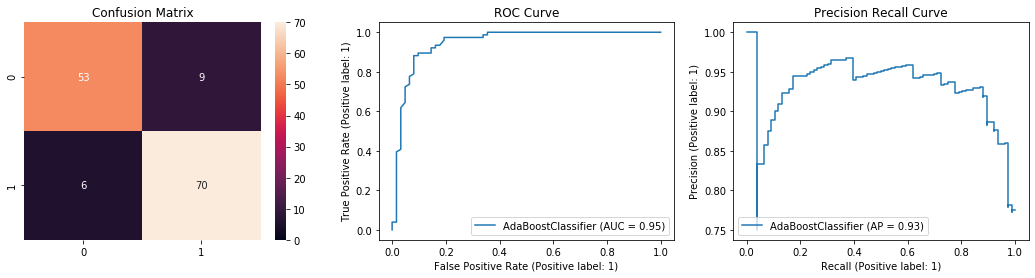

In [43]:
get_scores(grid_ada.best_estimator_, X_test_scaled, y_test)

========== LogisticRegression ==========
정확도: 0.8841, 정밀도: 0.8750, 재현율: 0.9211, f1 score: 0.8974, ROC_AUC score: 0.9493


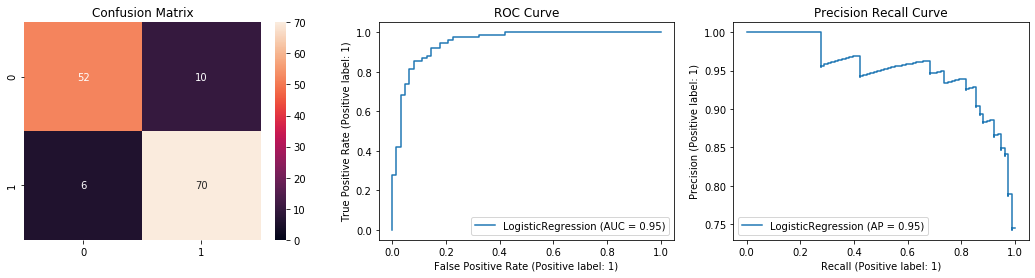

========== RandomForestClassifier ==========
정확도: 0.8986, 정밀도: 0.8974, 재현율: 0.9211, f1 score: 0.9091, ROC_AUC score: 0.9495


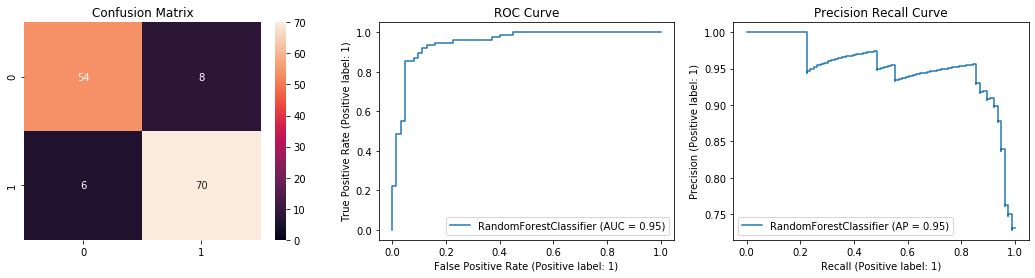

[14:44:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
========== XGBClassifier ==========
정확도: 0.8768, 정밀도: 0.8831, 재현율: 0.8947, f1 score: 0.8889, ROC_AUC score: 0.9421


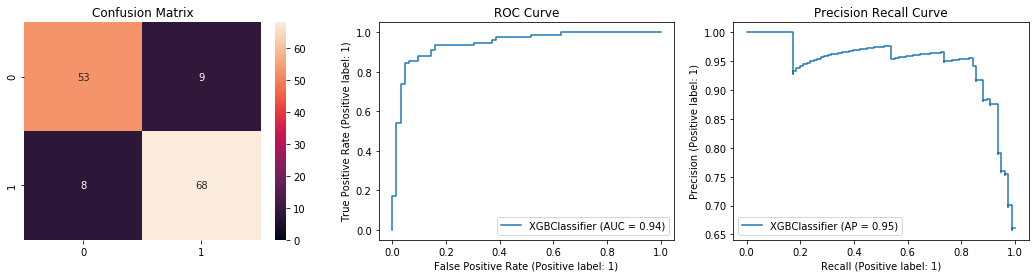

========== LGBMClassifier ==========
정확도: 0.9203, 정밀도: 0.9452, 재현율: 0.9079, f1 score: 0.9262, ROC_AUC score: 0.9486


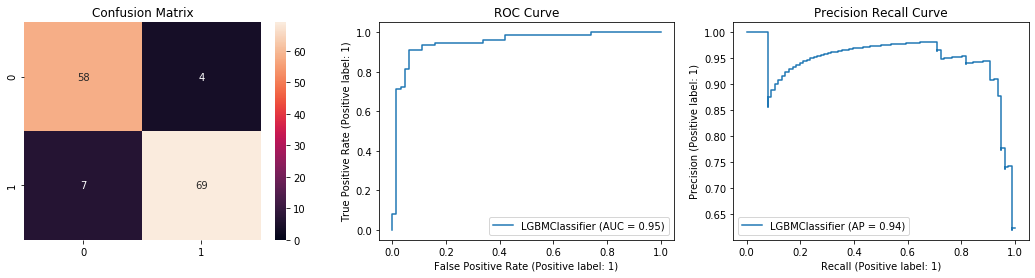

========== KNeighborsClassifier ==========
정확도: 0.8406, 정밀도: 0.8462, 재현율: 0.8684, f1 score: 0.8571, ROC_AUC score: 0.9091


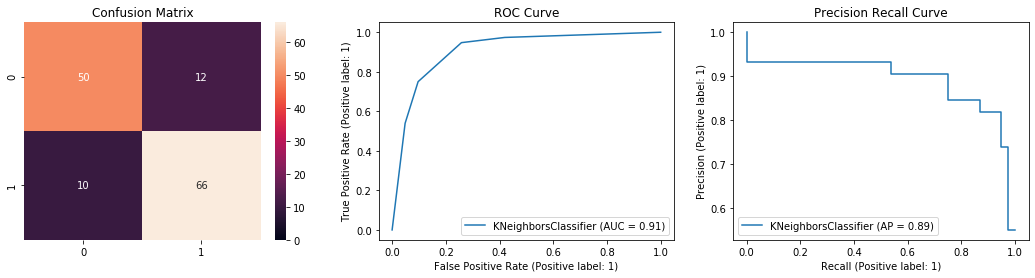

========== AdaBoostClassifier ==========
정확도: 0.8913, 정밀도: 0.8861, 재현율: 0.9211, f1 score: 0.9032, ROC_AUC score: 0.9468


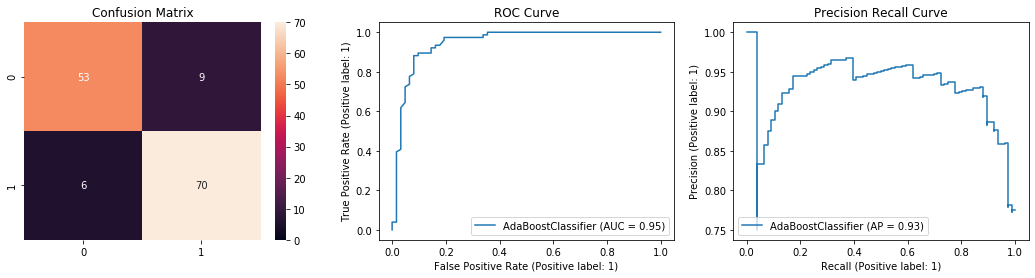

In [62]:
lr = LogisticRegression(fit_intercept=False, **grid_lr.best_params_)
rf = RandomForestClassifier(random_state=256, **grid_rf.best_params_)
xgb = XGBClassifier(**grid_xgb.best_params_)
lgb = LGBMClassifier(importance_type='gain', **grid_lgb.best_params_)
knn = KNeighborsClassifier(**grid_knn.best_params_)
ada = AdaBoostClassifier(random_state=0, **grid_ada.best_params_)

models = [lr, rf, xgb, lgb, knn, ada]
for model in models:
    model.fit(X_train_scaled, y_train)
    print('='*10, model.__class__.__name__, '='*10)
    get_scores(model, X_test_scaled, y_test)

### 앙상블 모델

In [63]:
def ensemble(models, X, y, coeffs):
    y_proba = np.zeros((y.shape[0], 2))
    for model, coeff in zip(models, coeffs):
        y_proba += coeff * model.predict_proba(X)
    y_pred = y_proba.argmax(axis=1)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_proba[:, 1])

    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1 score: {f1:.4f}, ROC_AUC score: {auc:.4f}')

    con = confusion_matrix(y, y_pred)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    sns.heatmap(data=con, vmin=0, annot=True, ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    plot_roc_curve(model, X, y, ax=axes[1])
    axes[1].set_title('ROC Curve')
    
    plot_precision_recall_curve(model, X, y, ax=axes[2])
    axes[2].set_title('Precision Recall Curve')
    
    plt.show()

정확도: 0.9203, 정밀도: 0.9221, 재현율: 0.9342, f1 score: 0.9281, ROC_AUC score: 0.9525


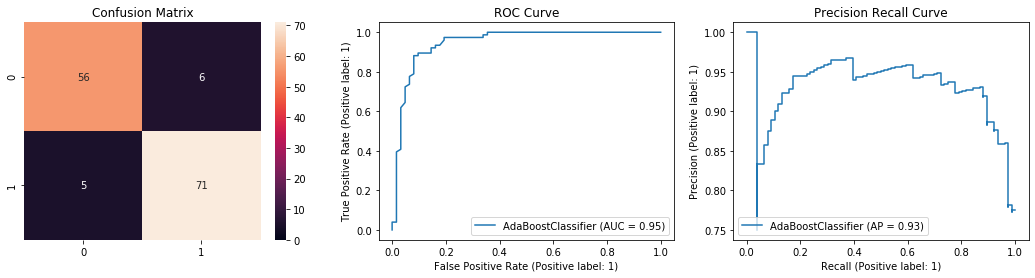

In [64]:
models = [lr, rf, xgb, lgb, knn, ada]
coeffs = [1/len(models) for _ in models]

ensemble(models, X_test_scaled, y_test, coeffs)

정확도: 0.9203, 정밀도: 0.9221, 재현율: 0.9342, f1 score: 0.9281, ROC_AUC score: 0.9544


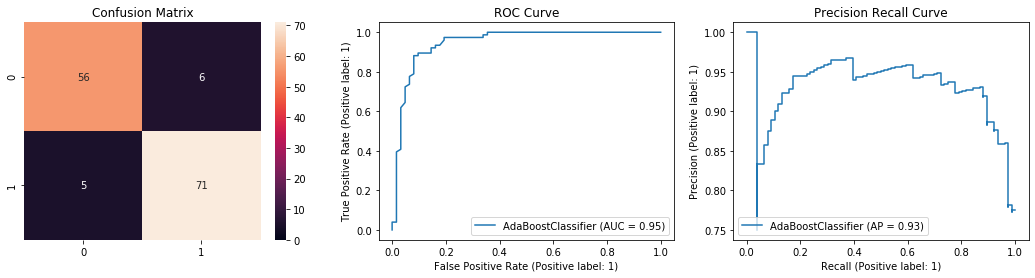

In [65]:
coeffs = [0.1, 0.2, 0.1, 0.3, 0.1, 0.2]

ensemble(models, X_test_scaled, y_test, coeffs)

정확도와 AUC가 가장 높은 모델이 만들어졌다.

## 분석

가장 성능이 좋은 LightGBM을 분석

### feature_importances_

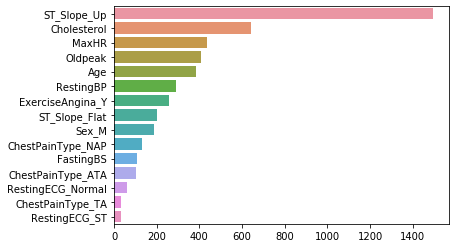

In [66]:
top20_features = pd.Series(lgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=top20_features.values, y=top20_features.index)
plt.show()

### Permutataion Importance

In [69]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgb, random_state=1).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0623 ± 0.0269,ST_Slope_Flat
0.0609 ± 0.0197,Oldpeak
0.0580 ± 0.0130,ST_Slope_Up
0.0391 ± 0.0235,MaxHR
0.0377 ± 0.0249,Sex_M
0.0333 ± 0.0284,FastingBS
0.0319 ± 0.0197,Cholesterol
0.0304 ± 0.0309,ChestPainType_NAP
0.0261 ± 0.0071,ExerciseAngina_Y
0.0159 ± 0.0169,RestingBP


### Partial Plots

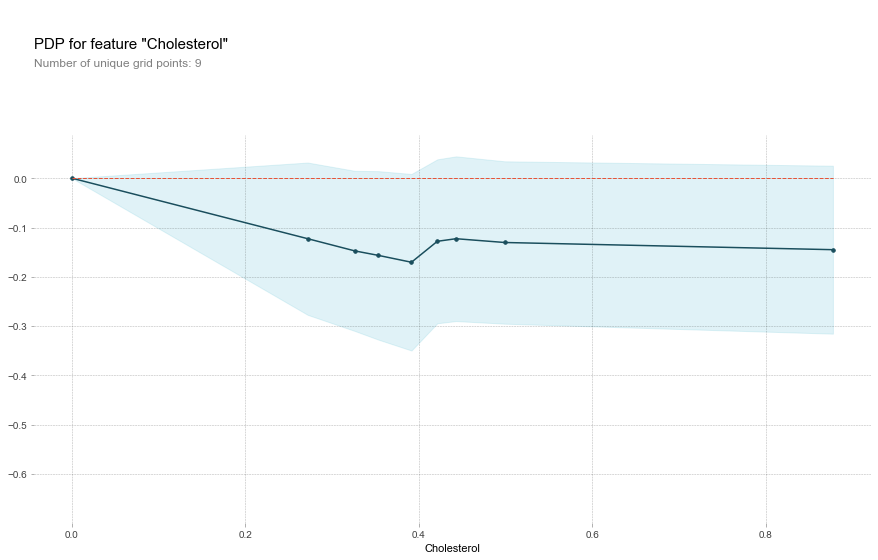

In [73]:
from pdpbox import pdp, get_dataset, info_plots

pdp_heart = pdp.pdp_isolate(model=lgb, dataset=pd.DataFrame(X_test_scaled, columns=X_test.columns), model_features=X_test.columns, feature='Cholesterol')
pdp.pdp_plot(pdp_heart, 'Cholesterol')
plt.show()

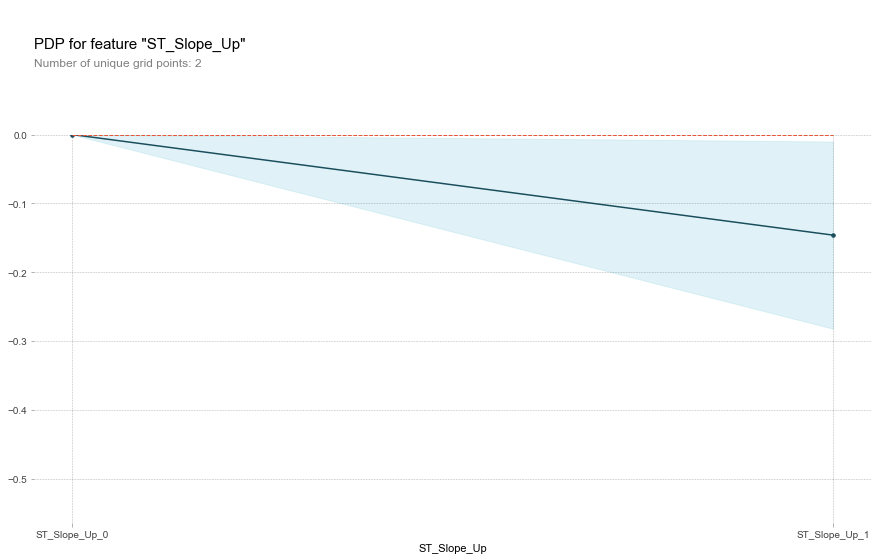

In [77]:
pdp_heart = pdp.pdp_isolate(model=lgb, dataset=pd.DataFrame(X_test_scaled, columns=X_test.columns), model_features=X_test.columns, feature='ST_Slope_Up')
pdp.pdp_plot(pdp_heart, 'ST_Slope_Up')
plt.show()

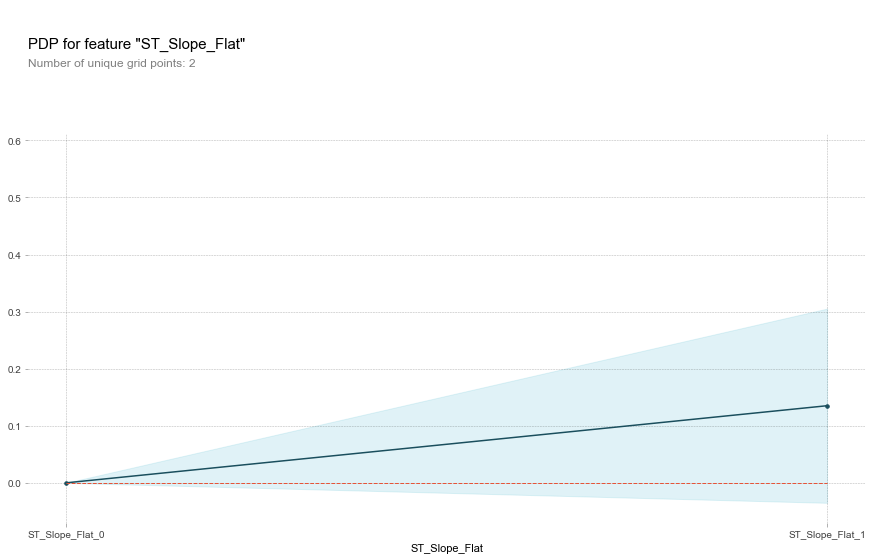

In [78]:
pdp_heart = pdp.pdp_isolate(model=lgb, dataset=pd.DataFrame(X_test_scaled, columns=X_test.columns), model_features=X_test.columns, feature='ST_Slope_Flat')
pdp.pdp_plot(pdp_heart, 'ST_Slope_Flat')
plt.show()

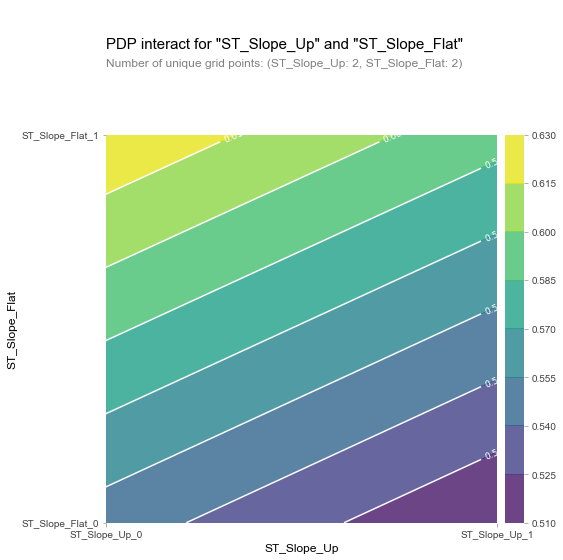

In [79]:
features_to_plot = ['ST_Slope_Up', 'ST_Slope_Flat']
inter1  =  pdp.pdp_interact(model=rf, dataset=X_train, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### SHAP values

In [80]:
y_test.iloc[2]

1

In [82]:
import shap

data_for_prediction = pd.Series(X_test_scaled[2, :], index=X_test.columns)


explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [85]:
y_test.iloc[3]

0

In [86]:
data_for_prediction = pd.Series(X_test_scaled[3, :], index=X_test.columns)


explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

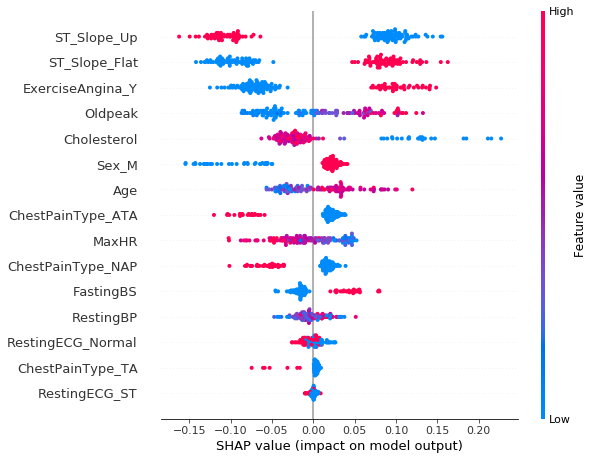

In [87]:
shap_values = explainer.shap_values(pd.DataFrame(X_test_scaled, columns=X_test.columns))
shap.summary_plot(shap_values[1], pd.DataFrame(X_test_scaled, columns=X_test.columns))

**ST_Slope를 봤을 때** Up이면 음의 영향=심부전 위험도가 낮음, Flat이면 양의 영향=심부전 위험도가 높음  
**Sex를 봤을 때** 남자면 양의 영향=심부전 위험도가 높음, 여자면 음의 영향=심부전 위험도가 낮음

### DNN

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 드랍아웃 추가
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1], )))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train_scaled, y_train.values, epochs=100,
                 validation_data=(X_test_scaled, y_test.values))

Epoch 1/100
25/25 [==============================] - 7s 11ms/step - loss: 0.6957 - accuracy: 0.5564 - val_loss: 0.6462 - val_accuracy: 0.5652
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6077 - val_loss: 0.5794 - val_accuracy: 0.8551
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.6821 - val_loss: 0.4880 - val_accuracy: 0.8841
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.7372 - val_loss: 0.3891 - val_accuracy: 0.8696
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7641 - val_loss: 0.3426 - val_accuracy: 0.8913
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4706 - accuracy: 0.8013 - val_loss: 0.3278 - val_accuracy: 0.8913
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7897 - val_loss: 0.3188 - val_accuracy: 0.8986
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8718 - val_loss: 0.2827 - val_accuracy: 0.9058
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8718 - val_loss: 0.2804 - val_accuracy: 0.9058
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.8667 - val_loss: 0.2804 - val_accuracy: 0.9058
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8821 - val_loss: 0.2770 - val_accuracy: 0.8986
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8679 - val_loss: 0.2803 - val_accuracy: 0.8913
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8628 - val_loss: 0.2808 - val_accuracy: 0.8841
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3263 - accuracy: 0.8692 - val_loss: 0.2828 - val_accuracy: 0.8841
Epoch 

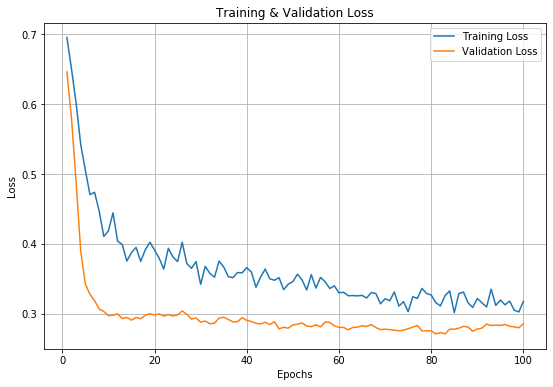

In [89]:
history = hist.history

epochs = range(1, len(history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, history['loss'])
plt.plot(epochs, history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

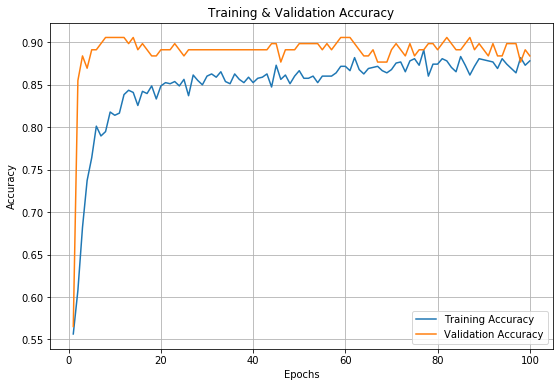

In [90]:
plt.figure(figsize=(9, 6))
plt.plot(epochs, history['accuracy'])
plt.plot(epochs, history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [91]:
model.evaluate(X_test_scaled, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.8841


[0.2857249677181244, 0.8840579986572266]

In [93]:
pred = model.predict(X_test_scaled)
pred[:5]

array([[0.89691716],
       [0.9221251 ],
       [0.8805474 ],
       [0.02482901],
       [0.46018472]], dtype=float32)

In [94]:
y_test[:5]

526    1
523    1
376    1
177    0
199    0
Name: HeartDisease, dtype: int64

In [95]:
y_pred = (pred > 0.5).astype(int)

정확도: 0.8841, 정밀도: 0.9054, 재현율: 0.8816, f1 score: 0.8933, ROC_AUC score: 0.9491


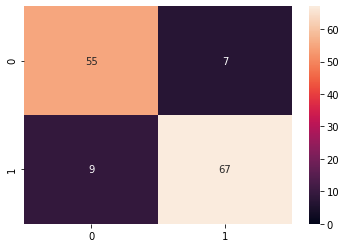

In [96]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, pred)

print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1 score: {f1:.4f}, ROC_AUC score: {auc:.4f}')

con = confusion_matrix(y_test, y_pred)
sns.heatmap(data=con, vmin=0, annot=True)
plt.show()